In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load cleaned data
df = pd.read_csv("C:/ML/data/train.csv")

# Fill missing values
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna("Unknown")

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split data
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data ready for Decision Tree!")


✅ Data ready for Decision Tree!


Train decision Tree classifier

In [3]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train model
tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = tree_model.predict(X_test)

print("🌳 Decision Tree Model Trained Successfully!")


🌳 Decision Tree Model Trained Successfully!


Evaluate model

🔹 Accuracy: 0.799

🔹 Confusion Matrix:


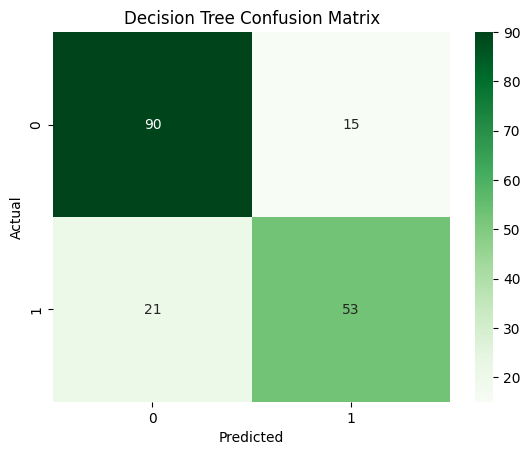


🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

acc_tree = accuracy_score(y_test, y_pred_tree)
print("🔹 Accuracy:", round(acc_tree, 3))

print("\n🔹 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_tree))


Visualizing the tree

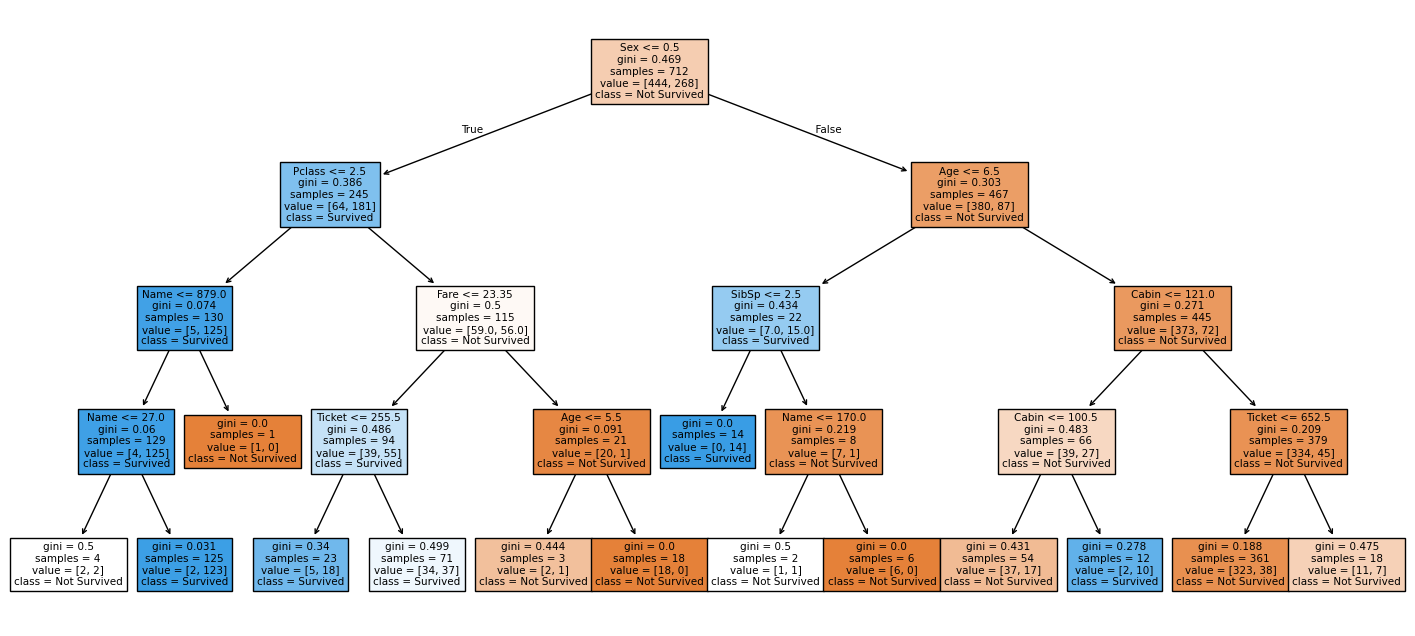

In [5]:
from sklearn import tree
plt.figure(figsize=(18,8))
tree.plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


Compare with logisctic regression

In [6]:
print("🔁 Model Comparison:")
print(f"Logistic Regression Accuracy: 0.81 (previous)")
print(f"Decision Tree Accuracy: {round(acc_tree, 3)}")


🔁 Model Comparison:
Logistic Regression Accuracy: 0.81 (previous)
Decision Tree Accuracy: 0.799


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Try different combinations
for depth in [3, 4, 5, 6, 8, 10]:
    for min_split in [2, 5, 10]:
        tree_model = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_split, random_state=42)
        tree_model.fit(X_train, y_train)
        y_pred_tree = tree_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred_tree)
        print(f"max_depth={depth}, min_samples_split={min_split} → Accuracy: {round(acc,3)}")


max_depth=3, min_samples_split=2 → Accuracy: 0.799
max_depth=3, min_samples_split=5 → Accuracy: 0.799
max_depth=3, min_samples_split=10 → Accuracy: 0.799
max_depth=4, min_samples_split=2 → Accuracy: 0.799
max_depth=4, min_samples_split=5 → Accuracy: 0.799
max_depth=4, min_samples_split=10 → Accuracy: 0.799
max_depth=5, min_samples_split=2 → Accuracy: 0.754
max_depth=5, min_samples_split=5 → Accuracy: 0.754
max_depth=5, min_samples_split=10 → Accuracy: 0.754
max_depth=6, min_samples_split=2 → Accuracy: 0.788
max_depth=6, min_samples_split=5 → Accuracy: 0.788
max_depth=6, min_samples_split=10 → Accuracy: 0.793
max_depth=8, min_samples_split=2 → Accuracy: 0.81
max_depth=8, min_samples_split=5 → Accuracy: 0.81
max_depth=8, min_samples_split=10 → Accuracy: 0.793
max_depth=10, min_samples_split=2 → Accuracy: 0.816
max_depth=10, min_samples_split=5 → Accuracy: 0.799
max_depth=10, min_samples_split=10 → Accuracy: 0.793


In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

# Initialize model and grid search
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1)

grid.fit(X_train, y_train)

print("✅ Best Parameters Found:", grid.best_params_)
print("🎯 Best Cross-Validation Accuracy:", round(grid.best_score_, 3))


✅ Best Parameters Found: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}
🎯 Best Cross-Validation Accuracy: 0.813


In [9]:
best_tree = grid.best_estimator_
y_pred_best = best_tree.predict(X_test)

print("📊 Tuned Decision Tree Test Accuracy:", round(accuracy_score(y_test, y_pred_best), 3))


📊 Tuned Decision Tree Test Accuracy: 0.799


🔹 2️⃣ ROC Curve & AUC Score — How Confident Is Your Model?

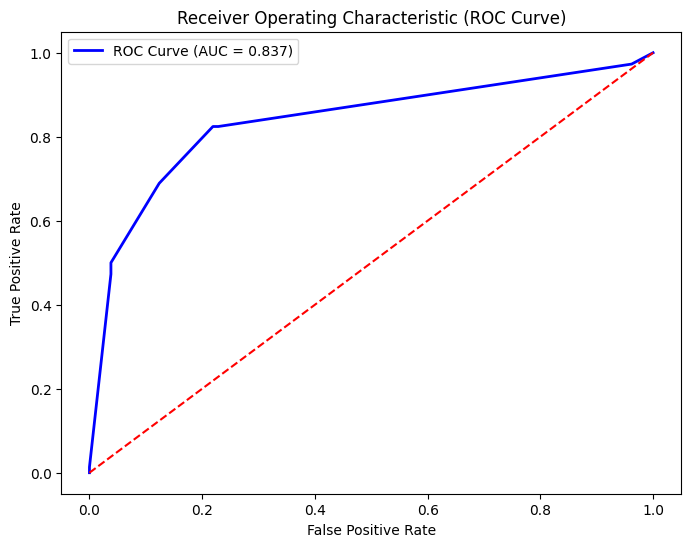

🔹 AUC Score: 0.837


In [10]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities instead of classes
y_pred_prob = best_tree.predict_proba(X_test)[:,1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend()
plt.show()

print("🔹 AUC Score:", round(roc_auc, 3))


#Re-Train Tree

In [11]:
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=6,
    min_samples_split=2,
    random_state=42
)

best_tree.fit(X_train, y_train)
y_pred_best = best_tree.predict(X_test)

from sklearn.metrics import accuracy_score
print("📊 Tuned Decision Tree Test Accuracy:", round(accuracy_score(y_test, y_pred_best), 3))

import joblib
joblib.dump(best_tree, "C:/ML/models/best_tree_model.joblib")
print("✅ Tuned Decision Tree model saved successfully!")



📊 Tuned Decision Tree Test Accuracy: 0.799
✅ Tuned Decision Tree model saved successfully!


🔹 1️⃣ Feature Importance — What Influences Survival Most?

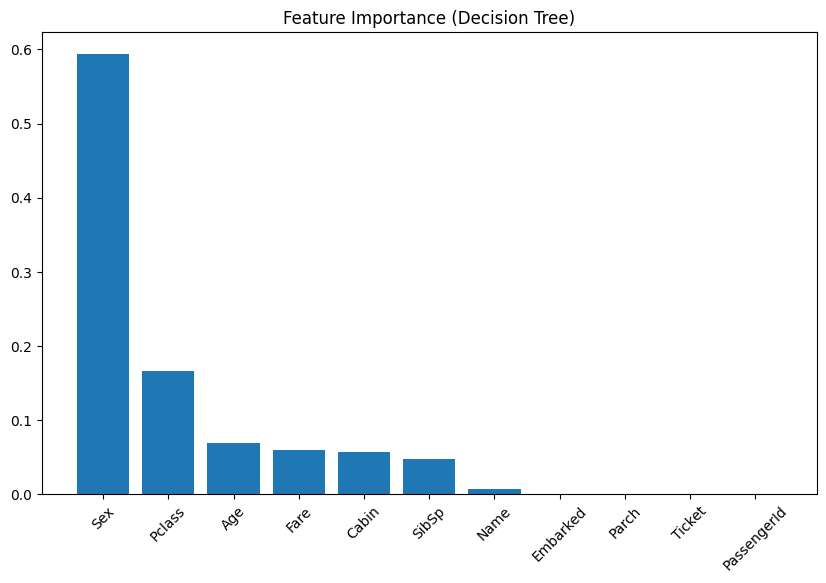

PassengerId: 0.0
Pclass: 0.166
Name: 0.007
Sex: 0.594
Age: 0.069
SibSp: 0.047
Parch: 0.0
Ticket: 0.0
Fare: 0.06
Cabin: 0.057
Embarked: 0.0


In [12]:
# Feature Importance
import numpy as np
import matplotlib.pyplot as plt

importances = best_tree.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance (Decision Tree)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.show()

for f, imp in zip(features, importances):
    print(f"{f}: {round(imp, 3)}")


In [13]:
import joblib

# Save
joblib.dump(best_tree, "C:/ML/models/tuned_decision_tree.joblib")
print("✅ Model saved successfully!")

# Load later (when needed)
loaded_tree = joblib.load("C:/ML/models/tuned_decision_tree.joblib")
print("🔁 Model loaded and ready to predict!")

# Test
print("Sample Prediction:", loaded_tree.predict(X_test[:5]))


✅ Model saved successfully!
🔁 Model loaded and ready to predict!
Sample Prediction: [0 0 0 1 1]
